In [15]:
%matplotlib inline

import sys
PATH = '/Users/francescogemignani/Desktop/fma-proj'
sys.path.insert(0, PATH) 

# libraries for imbalanced learning
from imblearn.under_sampling import RandomUnderSampler,CondensedNearestNeighbour, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE,KMeansSMOTE, ADASYN
from fma_metadata import utils
import pandas as pd
import numpy as np

# sklearn modules
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, classification_report, recall_score,precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

import plotly.express as px
import matplotlib.pyplot as plt

from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

# Librosa features - IMBALANCED LEARNING
## 1. Premise
The hyper-parameters and results for unbalanced classifiers are taken  from the notebooks:
- multi-genre_classification-features

Since in our previous analysis we found out that Decision Tree had higher performances with feature selection, we decided to improve our results starting from those classifiers.

__________________________________
# 2 Multi genre classification
__________________________________
## a) Import dataset

In [12]:
# When features-anomalyfree is avaiabled

multiclass_dataset = pd.read_csv('/Users/francescogemignani/Desktop/fma-proj/src/Module 1/Anomaly Detection/features_all-feats_outlierfree.csv')
multiclass_dataset.set_index('track_id',inplace=True)
genres_subset = ['Rock','Electronic','Hip-Hop','Folk','Old-Time / Historic','Pop','Classical','Jazz']
multiclass_dataset = multiclass_dataset[ multiclass_dataset['genre_top'].isin(genres_subset)]

In [44]:
#############
# TEMPORARY #
#############

# Import features
multiclass_dataset = utils.load('/Users/francescogemignani/Google Drive/DM2/_FMA/fma_metadata/features.csv')

# Import genre_labels dataset
labels = pd.read_csv('/Users/francescogemignani/Google Drive/DM2/_FMA/bkp/src/Data (cleaned)/genres_top')
labels=labels.set_index('track_id')

# Merging genre_top with librosa
multiclass_dataset = multiclass_dataset.merge(labels, on='track_id')

# drop duplicates
multiclass_dataset.drop_duplicates(keep=False, inplace=True)

# drop NaN
multiclass_dataset.dropna(inplace=True)

# Select top 8 genres
genres_subset = ['Rock','Electronic','Hip-Hop','Folk','Old-Time / Historic','Pop','Classical','Jazz']
multiclass_dataset = multiclass_dataset[multiclass_dataset['genre_top'].isin(genres_subset)]


[]

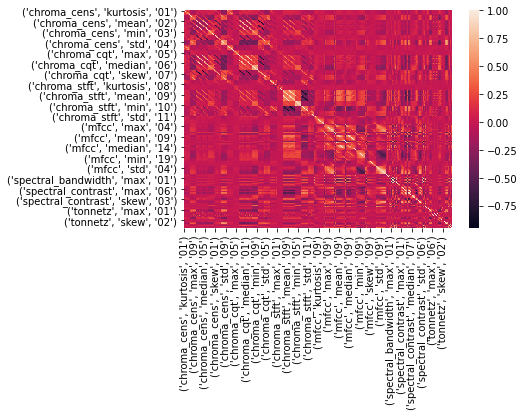

In [45]:
corr = multiclass_dataset.corr()
sns.heatmap(corr)
plt.plot()

In [42]:
# check class distribution in before balancing
pd.concat([multiclass_dataset.genre_top.value_counts(),
                round(multiclass_dataset.genre_top.value_counts(normalize=True).mul(100),2)],
          axis=1,
          keys=('counts','percentage (%)'))

,counts,percentage (%)
Rock,14073,41.40
Electronic,9009,26.50
Hip-Hop,3470,10.21
Folk,2778,8.17
Pop,2324,6.84
Classical,1222,3.59
Jazz,563,1.66
Old-Time / Historic,554,1.63
